In [1]:
from autometrics.dataset.datasets import Primock57
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.aggregator.regression import Ridge

In [2]:
dataset = Primock57(path='./autometrics/dataset/datasets/primock57/metric-scores.csv')

In [3]:
train, dev, test = dataset.get_splits(train_ratio=0.5, val_ratio=0.2, seed=42)

# Best Metrics Before Our Method

In [4]:
display_top_5_metrics_by_validation(dev, test, False)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,edited_note | Levenshtein dist. (-0.8134500640...,max | Levenshtein dist. (-0.6629837858397793),edited_note | BertScore* (-0.7540832779588538),edited_note | ROUGE-L-F1* (-0.6660263901067724),edited_note | WIL (-0.6649671351962892)
incorrect,max | ROUGE-L-Pr* (-0.7406377439784146),edited_note | ROUGE-L-Pr* (-0.7819025542273357),avg | ROUGE-4-F1* (-0.5857819574048555),avg | WIL (-0.577603195057505),avg | ROUGE-L-Pr* (-0.6363010519935143)
omissions,edited_note | Levenshtein dist. (-0.8345303687...,edited_note | METEOR* (-0.8144662180246632),edited_note | BertScore* (-0.80275364628142),edited_note | ROUGE-L-Re* (-0.7686336354035378),edited_note | BLEU* (-0.7901060574883215)
inc_plus_omi,edited_note | Levenshtein dist. (-0.8211289677...,max | Levenshtein dist. (-0.7426571712816399),edited_note | BertScore* (-0.8083746292896553),avg | BertScore* (-0.7404840396188012),avg | WIL (-0.7200653545491519)


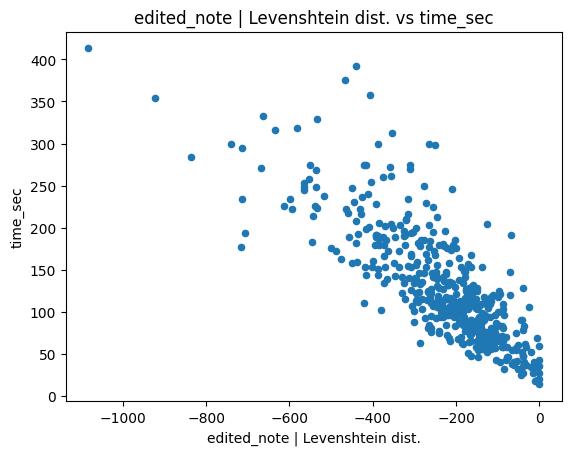

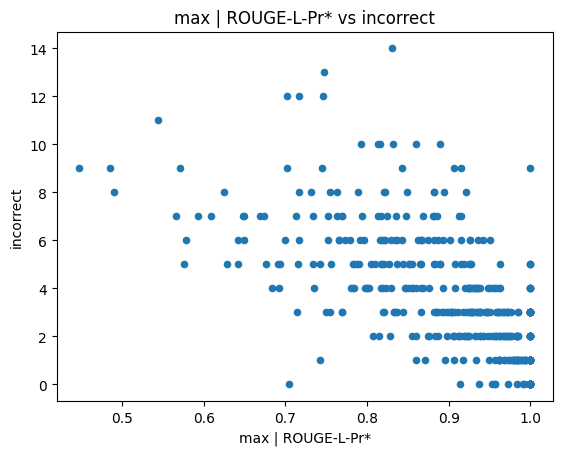

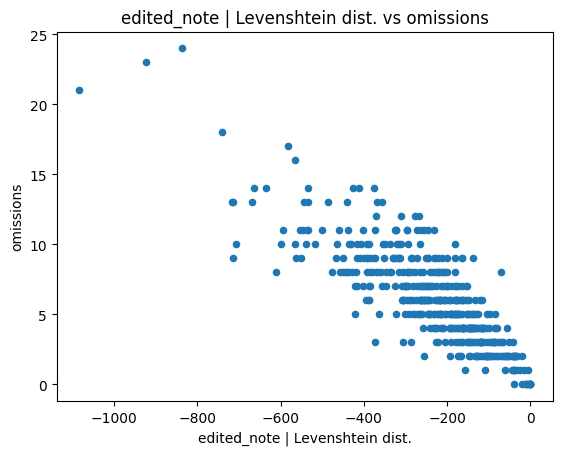

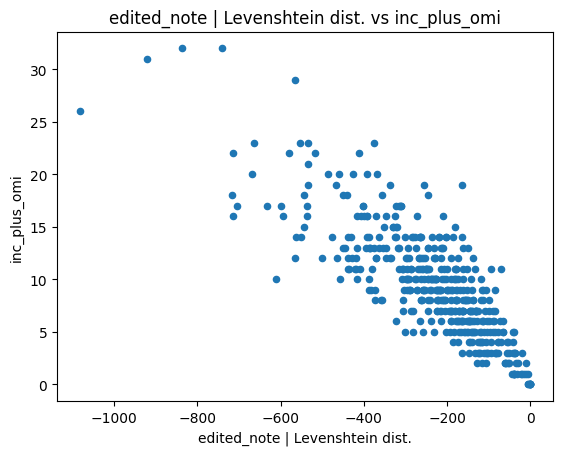

In [5]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, False)
    plot_metric_target_scatterplot(test, metric, target_column)

# Optimize Using our Method

In [6]:
for target_column in dataset.target_columns:
    model_instance = Ridge(dataset=train, name='Ridge_' + target_column)
    model_instance.learn(train, target_column)
    model_instance.predict(train, target_column)
    model_instance.predict(dev, target_column)
    model_instance.predict(test, target_column)

In [7]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8592577281544004),edited_note | Levenshtein dist. (-0.8134500640...,Rg_inc_plus_omi (0.8230112737387193),Rg_omissions (0.8201575732158578),max | Levenshtein dist. (-0.6629837858397793)
incorrect,Rg_incorrect (0.8332113062756047),max | ROUGE-L-Pr* (-0.7406377439784146),edited_note | ROUGE-L-Pr* (-0.7819025542273357),Rg_inc_plus_omi (0.6932146096424666),avg | ROUGE-4-F1* (-0.5857819574048555)
omissions,Rg_omissions (0.8664279133404861),edited_note | Levenshtein dist. (-0.8345303687...,Rg_inc_plus_omi (0.7952304697849861),edited_note | METEOR* (-0.8144662180246632),edited_note | BertScore* (-0.80275364628142)
inc_plus_omi,Rg_inc_plus_omi (0.8884375268080532),Rg_omissions (0.8090323503935646),Rg_time_sec (0.8564544776012416),edited_note | Levenshtein dist. (-0.8211289677...,max | Levenshtein dist. (-0.7426571712816399)


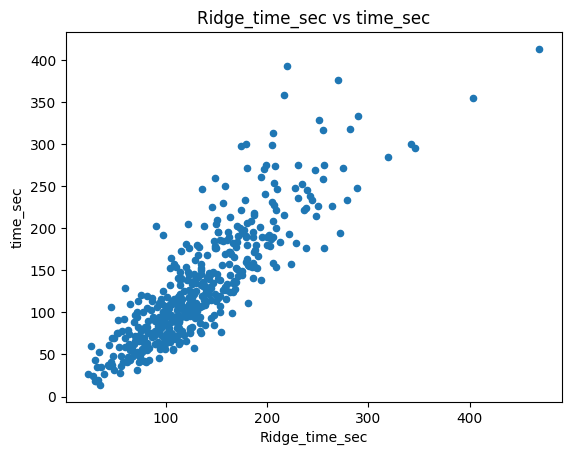

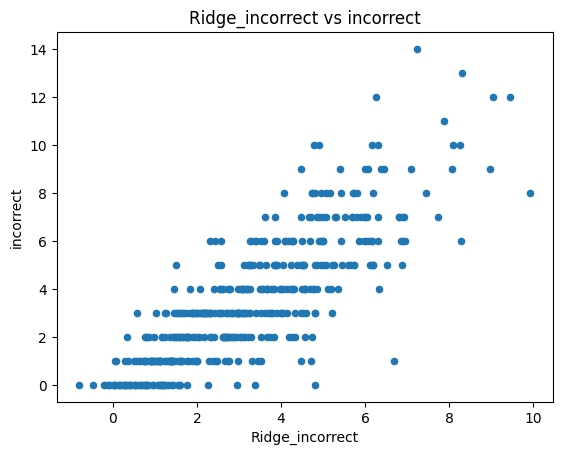

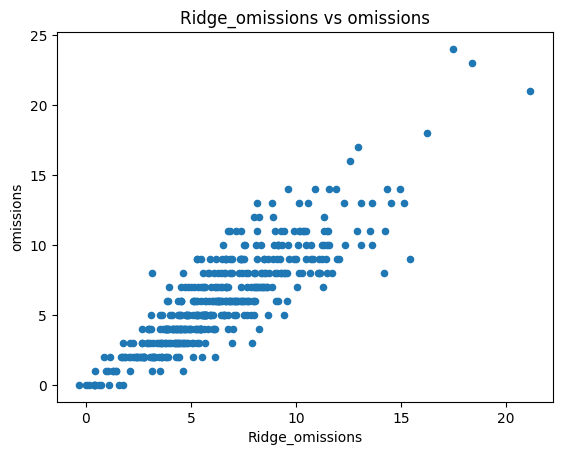

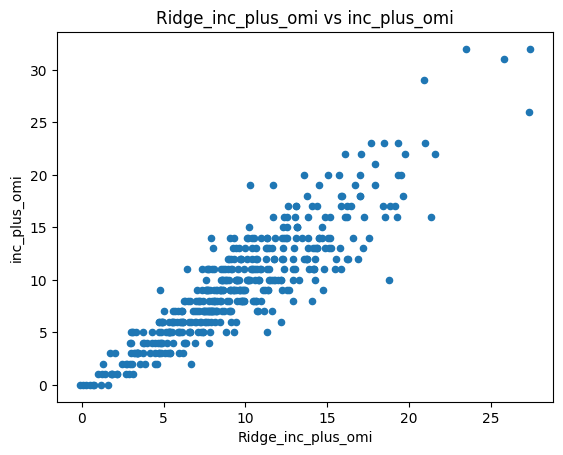

In [8]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)

In [9]:
# Get the top 5 scoring for Ridge_inc_plus_omi column and display just the generated_note and the score
test.get_dataframe().sort_values('Ridge_inc_plus_omi', ascending=False)[['generated_note', 'Ridge_inc_plus_omi', 'consultation_id']].head(5)

,generated_note,Ridge_inc_plus_omi,consultation_id
955,-You are at home in a private location for tod...,27.410740,day2_consultation05
1085,You are at home and able to have a private con...,27.309986,day5_consultation10
1087,You told us that you are in a private place an...,25.819225,day5_consultation10
1089,calling from Babylon. Location is from home an...,23.483156,day5_consultation10
1086,3 point ID check done. At home. In a private p...,21.558090,day5_consultation10


In [10]:
# Print just the generated_note and human_note for the top 5 scoring for Ridge_inc_plus_omi column
for index, row in test.get_dataframe().sort_values('Ridge_inc_plus_omi', ascending=False)[['generated_note', 'human_note', 'consultation_id', 'Ridge_inc_plus_omi']].head(5).iterrows():
    print('---------------------- score:', row['Ridge_inc_plus_omi'], '----------------------')

    print("Reference:", row['human_note'])
    print("Generated:", row['generated_note'])
    
    print('----------------------')

---------------------- score: 27.410739588798055 ----------------------
Reference: (the above consultation reason doesn't correlate with the patient's presentation). Hx: episodes of unilateral right hand numbness/ pins and needles, with some right leg weakness and noticeable gait disturbances, ongoing for 1.5 months. occurring with increasing frequency- initially once a week, now more often, occurring daily. symptoms not present now. no dysphagia, no dysphasia. no Pmhx of CVA/TIA. Father had CVA- appears to have had carotid endarterectomy. Non smoker, normal blood tests for diabetes/ cholesterol when checked a few years ago. PMHx and FH: otherwise nil of note. DH PT IS TAKING Aspirin daily on his own accord due to his FH. SH: pt is a medical doctor, plastic surgeon, lives with wife.
Generated: -You are at home in a private location for today's consultation. -3 point ID checks clear. -HPC: You have been experiencing weird symptoms for about a month. Symptom onset: tired for a couple of 

In [11]:
# Get the bottom 5 scoring for Ridge_inc_plus_omi column and display just the generated_note and the score
test.get_dataframe().sort_values('Ridge_inc_plus_omi', ascending=True)[['generated_note', 'Ridge_inc_plus_omi', 'consultation_id']].head(5)

,generated_note,Ridge_inc_plus_omi,consultation_id
355,3/7 hx of dysuria and suprapubic pain. Nil fre...,-0.133135,day1_consultation09
1258,Hx of fever for a week with associated sweatin...,0.056308,day2_consultation08
403,Hx of fever for a week with associated sweatin...,0.288482,day2_consultation08
867,"3/7 hx of diarrhea - watery stools, opening bo...",0.511283,day1_consultation011
973,Hx of fever for a week with associated sweatin...,0.669565,day2_consultation08


In [12]:
# Print just the generated_note and human_note for the top 5 scoring for Ridge_inc_plus_omi column
for index, row in test.get_dataframe().sort_values('Ridge_inc_plus_omi', ascending=True)[['generated_note', 'human_note', 'consultation_id', 'Ridge_inc_plus_omi']].head(25).iterrows():
    if row['Ridge_inc_plus_omi'] < 2.5:
        continue
    print('---------------------- score:', row['Ridge_inc_plus_omi'], '----------------------')

    print("Reference:", row['human_note'])
    print("Generated:", row['generated_note'])
    
    print('----------------------')

---------------------- score: 2.7053966274222567 ----------------------
Reference: 3/7 hx of diarrhea - watery stools, opening bowels every hour. No blood in stools. Assoc crampy abdo pain - central, intermittent, severity 6/10. Feels nauseous, has vomited occasionally. Feeling feverish, hot/cold. Nil urinary sx - passing less urine . no weight loss. Brother also had similar sx - improving. Tolerating oral intake. PMH: nil. DH: nil regular. NKDA. FH: father - colon Ca. SH: lives with sister and mum. Works in office. Smokes socially, EtOH - socially.
Generated: 3/7 hx of diarrhea - watery stools, opening bowels every hour. No blood in stools. Assoc crampy abdo pain - central, intermittent, severity 6/10. Feels nauseous, has vomited occasionally. Feeling feverish, hot/cold. Nil urinary sx - passing less urine . no weight loss. Brother also had similar sx - improving. Tolerating oral intake. PMH: nil. DH: nil regular. NKDA. FH: father - colon Ca. SH: lives with sister and mum. Works in of